In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [20]:
import tensorflow 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Activation,LeakyReLU
from tensorflow.keras.activations import sigmoid,softmax,relu
from tensorflow.keras.optimizers import Adagrad,Adam,Adadelta,Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imutils import paths

### ResNet50

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [5]:
from tensorflow.keras.applications.vgg19 import VGG19

In [27]:
image_size = [224,224]

train_data = 'D:\\Finetuning techniques\\data\\archive\\Data\\train'
test_data = 'D:\\Finetuning techniques\\data\\archive\\Data\\test'

In [7]:
res = ResNet50(input_shape=image_size + [3] , weights='imagenet' , include_top = False)

94781440/94765736 [==============================] - 42s 0us/step


In [10]:
for layers in res.layers:
    layers.trainable=False

In [11]:
x = Flatten()(res.output)

In [12]:
from glob import glob


In [13]:
a = glob('D:\\Finetuning techniques\\data\\archive\\Data\\train\\*')

In [14]:
len(a)

3

In [15]:
predict = Dense(len(a) , activation = 'softmax')(x)

In [17]:
model = Model(inputs = res.inputs ,outputs = predict)

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [28]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [29]:
train_generator = generator.flow_from_directory (
    train_data,
    target_size=image_size,
    class_mode='categorical',
    color_mode = 'rgb',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


In [30]:
test_generator = generator.flow_from_directory (
    test_data,
    target_size=image_size,
    class_mode='categorical',
    color_mode = 'rgb',
    batch_size=32,
    shuffle=False,
)

Found 1288 images belonging to 3 classes.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [33]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
model.fit_generator(train_generator, validation_data=test_generator, epochs=10, callbacks=[stop])

C:\Users\korla\anaconda3\envs\TF\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
161/161 [==============================] - 412s 3s/step - loss: 1.3221 - accuracy: 0.6775 - val_loss: 0.6100 - val_accuracy: 0.7391
Epoch 2/10
161/161 [==============================] - 376s 2s/step - loss: 0.7574 - accuracy: 0.7356 - val_loss: 0.4249 - val_accuracy: 0.8509
Epoch 3/10
161/161 [==============================] - 393s 2s/step - loss: 0.6177 - accuracy: 0.7673 - val_loss: 0.5911 - val_accuracy: 0.7958
Epoch 4/10
161/161 [==============================] - 386s 2s/step - loss: 0.5739 - accuracy: 0.7930 - val_loss: 0.8115 - val_accuracy: 0.6607
Epoch 5/10
161/161 [==============================] - 403s 3s/step - loss: 0.4768 - accuracy: 0.8245 - val_loss: 0.4940 - val_accuracy: 0.7834
Epoch 6/10
161/161 [==============================] - 397s 2s/step - loss: 0.4542 - accuracy: 0.8272 - val_loss: 0.3455 - val_accuracy: 0.8758
Epoch 7/10
161/161 [==============================] - 418s 3s/step - loss: 0.4486 - accuracy: 0.8307 - val_loss: 0.4194 - val_accuracy: 0.8315

In [35]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
train_loss = model.history.history['loss']
train_loss

[1.322103500366211,
 0.7573678493499756,
 0.6176745295524597,
 0.5739272236824036,
 0.4768255352973938,
 0.4541862905025482,
 0.4485853910446167,
 0.44987204670906067,
 0.4565953314304352,
 0.411642462015152]

In [37]:
test_loss = model.history.history['val_loss']
test_loss

[0.6100099682807922,
 0.424872487783432,
 0.591067910194397,
 0.8114580512046814,
 0.49403002858161926,
 0.3455396592617035,
 0.4193548262119293,
 0.3998420238494873,
 0.34821128845214844,
 0.3405548334121704]

In [38]:
train_acc = model.history.history['accuracy']
train_acc

[0.6774883270263672,
 0.7356142997741699,
 0.7673017382621765,
 0.7929626703262329,
 0.8244556784629822,
 0.8271772861480713,
 0.8306764960289001,
 0.8349533677101135,
 0.8322317004203796,
 0.842729389667511]

In [39]:
test_acc = model.history.history['val_accuracy']
test_acc

[0.739130437374115,
 0.850931704044342,
 0.7958074808120728,
 0.6607142686843872,
 0.7833850979804993,
 0.8757764101028442,
 0.83152174949646,
 0.8447204828262329,
 0.8563664555549622,
 0.8742235898971558]

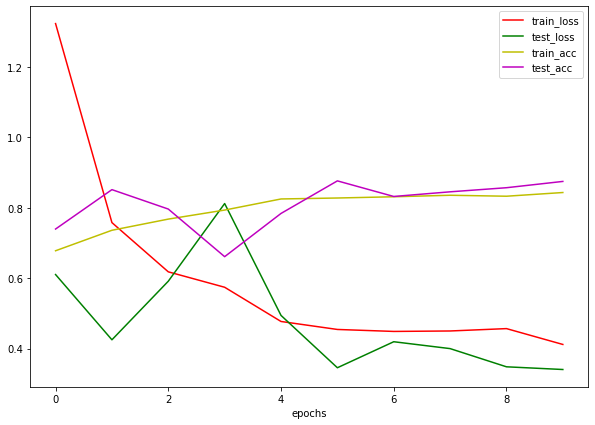

In [40]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(10),train_loss,color='r',label='train_loss')
plt.plot(np.arange(10),test_loss,color='g',label='test_loss')
plt.plot(np.arange(10),train_acc,color='y',label='train_acc')
plt.plot(np.arange(10),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()

### validation Report 

In [41]:
y_test_pred = model.predict(test_generator)

In [42]:
y_test_pred[:10]

array([[9.0833098e-01, 8.5180439e-03, 8.3150998e-02],
       [9.9244213e-01, 4.3134023e-03, 3.2444519e-03],
       [2.5065551e-02, 1.9854935e-02, 9.5507956e-01],
       [8.2529527e-01, 1.0830134e-01, 6.6403382e-02],
       [9.7062969e-01, 6.2911860e-03, 2.3079081e-02],
       [6.5053099e-01, 1.8551442e-03, 3.4761390e-01],
       [9.9135572e-01, 8.4407832e-03, 2.0353074e-04],
       [9.1666746e-01, 3.9546649e-04, 8.2937099e-02],
       [9.6344692e-01, 8.9298179e-03, 2.7623205e-02],
       [6.8143892e-01, 9.4426115e-04, 3.1761679e-01]], dtype=float32)

In [43]:
y_test_pred = np.argmax(y_test_pred,axis = 1)

In [44]:
len(y_test_pred)

1288

In [45]:
len(test_generator.classes)

1288

In [46]:
test_generator.classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
y_test_pred[:10]

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
accuracy_score(test_generator.classes,y_test_pred)

0.8765527950310559

In [50]:
confusion_matrix(test_generator.classes,y_test_pred)

array([[105,   0,  11],
       [  4, 199, 114],
       [  8,  22, 825]], dtype=int64)

In [51]:
print(classification_report(test_generator.classes,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       116
           1       0.90      0.63      0.74       317
           2       0.87      0.96      0.91       855

    accuracy                           0.88      1288
   macro avg       0.89      0.83      0.85      1288
weighted avg       0.88      0.88      0.87      1288



### Testing with real data 

In [52]:
import cv2

In [53]:
labels = ['covid','normal','phenomia']

In [54]:
from tensorflow.keras.preprocessing import image

In [63]:
def fun(path):
    
    img = cv2.imread(path)
    im_resize = cv2.resize(img,(400,400),interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resize,cv2.COLOR_BGR2RGB))
    
    image_pred = image.load_img(path,target_size=(224,224) )
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis = 0)
    
    result = model.predict(a)
    print(result)
    
    q = np.argmax(result,axis = 1)
    print(q)
    print(labels[q[0]])
    
    

[[1.0000000e+00 2.9567551e-35 4.1452895e-18]]
[0]
covid


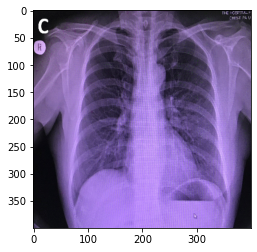

In [64]:
fun('D:\\Finetuning techniques\\data\\archive\\Data\\test\\COVID19\\20.jpg')

[[1.000000e+00 0.000000e+00 8.289579e-20]]
[0]
covid


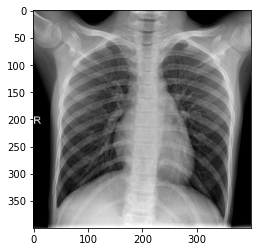

In [73]:
fun('D:\\Finetuning techniques\\data\\archive\\Data\\test\\Normal\\32.jpg')

[[1.0000000e+00 1.0249324e-32 1.9209822e-21]]
[0]
covid


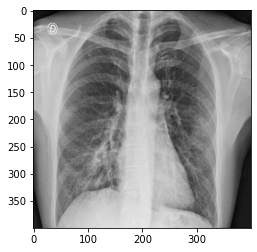

In [69]:
fun("D:\\Finetuning techniques\\data\\archive\\Data\\test\\COVID19\\4.jpg")